In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
mnist= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print( x_train[0].min(),x_train[0].max())

0 255


In [4]:
#normalise values from 0-255 to 0-1
x_train=x_train / 255
xtest= x_test/255

In [5]:
#to see image shape using first image
imglen,imgwidth =x_train[0].shape
print(imglen,"x",imgwidth)

28 x 28


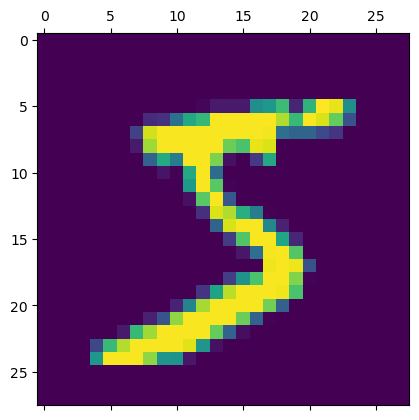

In [6]:
#to see how first image looks
plt.matshow(x_train[0])

In [7]:
#defining model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])
#neuron number , activation function

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
#training model using SGD
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6618 - accuracy: 0.8299 - val_loss: 37.4098 - val_accuracy: 0.9022
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3398 - accuracy: 0.9041 - val_loss: 35.5718 - val_accuracy: 0.9183
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2908 - accuracy: 0.9177 - val_loss: 34.9538 - val_accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2615 - accuracy: 0.9265 - val_loss: 31.8100 - val_accuracy: 0.9292
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2391 - accuracy: 0.9330 - val_loss: 30.6447 - val_accuracy: 0.9335
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2210 - accuracy: 0.9381 - val_loss: 29.3203 - val_accuracy: 0.9368
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2055 - accuracy: 0.9423 - val_loss: 26.5870 - val_a

In [11]:
#evaluate network
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 23.6623 - accuracy: 0.9481
Loss = 23.662
Accuracy = 0.948


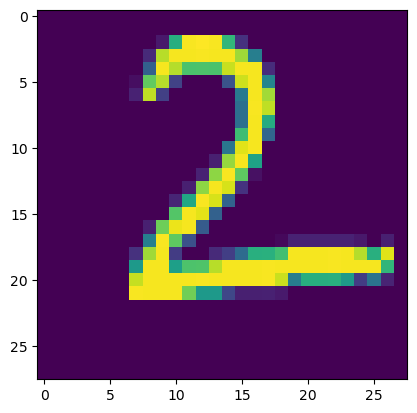

313/313 [==============================] - 2s 4ms/step


In [12]:
#Making Prediction on New Data
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)


In [13]:
print('Predicted Value: ',predicted_value[n])
print(predicted_value[n].argmax())
# Print the predicted probabilities for that image

Predicted Value:  [0.         0.         0.99999994 0.         0.         0.
 0.         0.         0.         0.        ]
2


In [14]:
np.argmax(predicted_value[n])

2

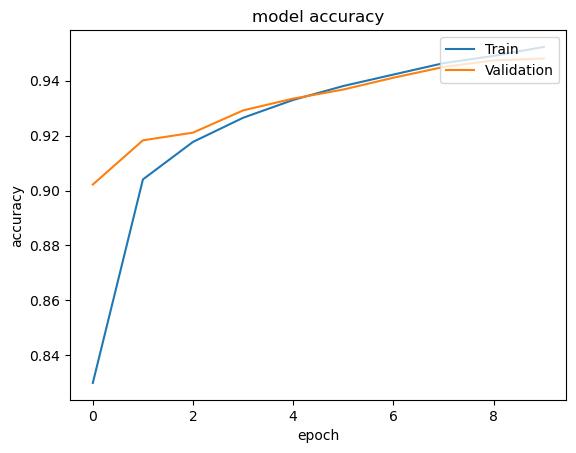

In [15]:
#plotting traing  accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

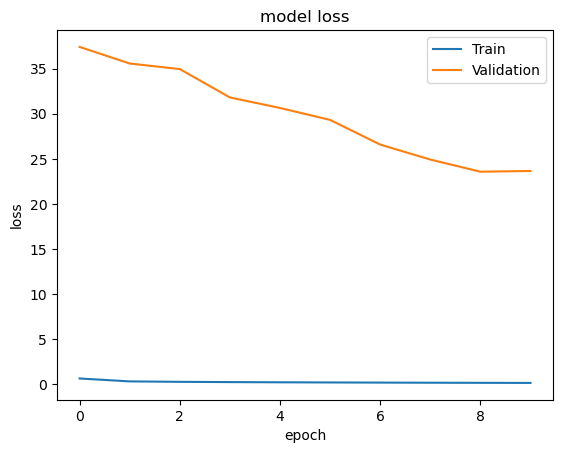

In [16]:
#plotting traing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [17]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 3ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 965    0    1    3    1    1    4    1    4    0]
 [   0 1109    4    2    1    0    4    2   13    0]
 [   8    0  981    9    6    0    6    6   15    1]
 [   0    0   10  972    0    1    0    8   14    5]
 [   1    0    4    1  932    0   12    1    6   25]
 [  10    2    1   44    5  774   14    5   31    6]
 [  11    3    3    2    5    4  923    1    6    0]
 [   3    8   21    7    4    0    0  954    4   27]
 [   5    1    4   10    3    1   10    5  932    3]
 [  10    6    1   14   25    0    1    5    8  939]], shape=(10, 10), dtype=int32)
